#Task

Using the provided “Python dataset” csv file, provide answers to the below questions.

What can you tell us about the relationships between sales and metrics A and B?

If metric A increased by 10% over the next 3 months what could we expect from sales?

If metric B decreased by 10% over the next 3 months, what would we expect from sales in the same period?

Which model(s) and methodologies have you used and why?

How have you tested the accuracy of your forecast?


In [ ]:
# Import relevant packages

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import ccf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import pearsonr
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q1. What can you tell us about the relationships between sales and metrics A and B?**

In [ ]:
# Import the data

data = pd.read_csv("/content/drive/My Drive/Disclosed Analytics 2/Python dataset.csv")

In [ ]:
# Check if data is uploaded properly

print(data.head())

         Date       Sales   Metric_A   Metric_B
0  2023-01-01  101.970916  18.727006  58.152247
1  2023-01-02   98.872847  47.535715  65.523814
2  2023-01-03   99.907132  36.599697  16.878402
3  2023-01-04   97.274286  29.932924  55.411676
4  2023-01-05  100.000600   7.800932  45.946950


In [ ]:
# Checking for nulls

print(data.isnull().sum())

Date        0
Sales       0
Metric_A    0
Metric_B    0
dtype: int64


Thus there are 0 nulls.

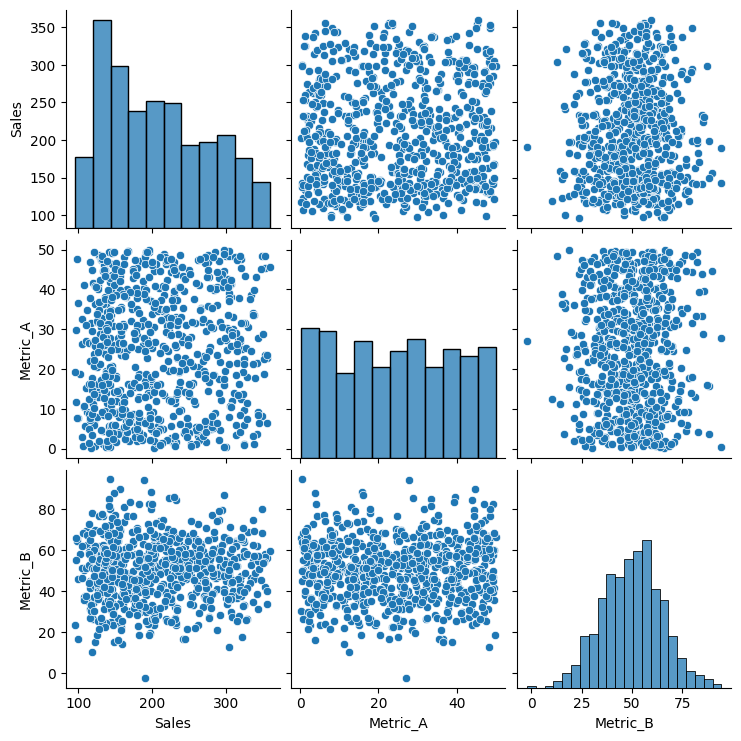

In [ ]:
# Check the relationships between Sales, Metric A and Metric B

# First I am going to visualise the relationships using a pairplot

sns.pairplot(data[['Sales', 'Metric_A', 'Metric_B']])
plt.show()

From the scatterplots. it looks like there are no clear linear relationships between Sales, Metric A and Metric B.

In [ ]:
# Lets also calculate the correlations using a correlation matrix

correlation_matrix = data[['Sales', 'Metric_A', 'Metric_B']].corr(method ='spearman')
print(correlation_matrix)

             Sales  Metric_A  Metric_B
Sales     1.000000  0.051665  0.022963
Metric_A  0.051665  1.000000  0.021301
Metric_B  0.022963  0.021301  1.000000


This means that if there was a non-linear correlation, it would be very weak.

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.set_index('Date', inplace=True)

                 Sales   Metric_A   Metric_B
Date                                        
2023-01-01  101.970916  18.727006  58.152247
2023-01-02   98.872847  47.535715  65.523814
2023-01-03   99.907132  36.599697  16.878402
2023-01-04   97.274286  29.932924  55.411676
2023-01-05  100.000600   7.800932  45.946950


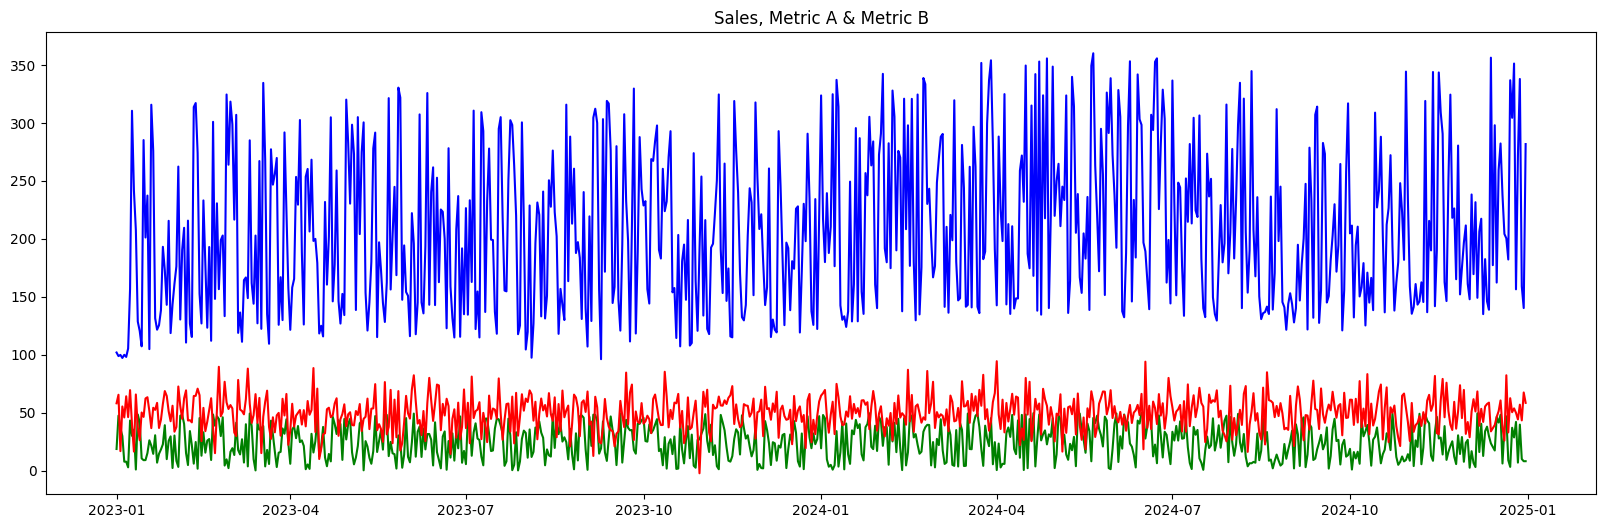

In [ ]:

# I am going to plot a line graph to visualise trends

print(data.head())

plt.figure(figsize=(20, 6))
plt.plot(data["Sales"], label='Sales', color="blue")
plt.plot(data["Metric_A"], label='Metric A', color='green')
plt.plot(data['Metric_B'], label='Metric B', color='red')
plt.title('Sales, Metric A & Metric B')
plt.show()


Based on the graph, it looks like there are little to no seasonality/lags trends.

But there is alot of noise in this plot. So I am going to split the data up quarterly.

<ipython-input-10-955a47932643>:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = data.resample('Q').sum()


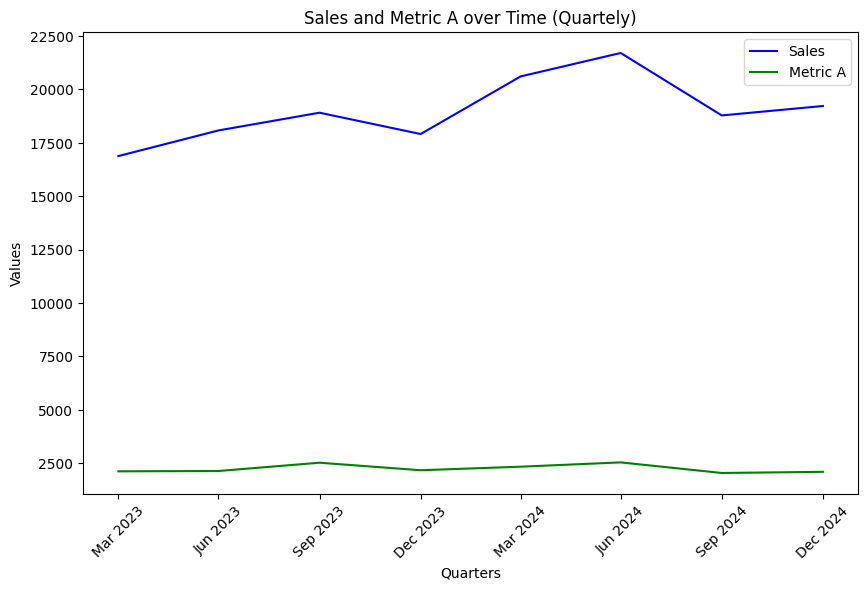

In [ ]:
# Lets break it up quartely

quarterly_data = data.resample('Q').sum()

plt.figure(figsize=(10, 6))
plt.plot(quarterly_data.index, quarterly_data['Sales'], label='Sales', color='blue')
plt.plot(quarterly_data.index, quarterly_data['Metric_A'], label='Metric A', color='green')

# Formatting the plot
plt.title('Sales and Metric A over Time (Quartely)')
plt.xlabel('Quarters')
plt.xticks(rotation=45)
plt.ylabel('Values')
plt.xticks(quarterly_data.index, quarterly_data.index.strftime('%b %Y'))

plt.legend()

# Show the plot
plt.show()

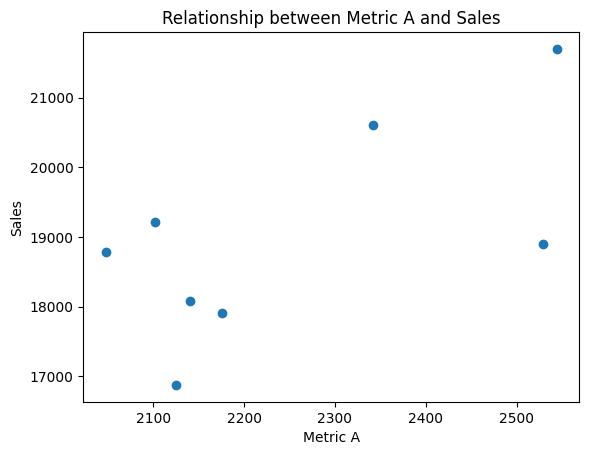

In [ ]:
# Lets find the relationship between Metric A and Sales

plt.scatter(quarterly_data['Metric_A'], quarterly_data["Sales"])
plt.xlabel('Metric A')
plt.ylabel('Sales')
plt.title('Relationship between Metric A and Sales')
plt.show()

Based on this, it looks like a positive correlation.

In [ ]:
quarterly_data[['Metric_A', 'Sales']].corr(method ='pearson')

,Metric_A,Sales
Metric_A,1.00000,0.65208
Sales,0.65208,1.00000


So looks like there is a positive correlation between Metric A and Sales where the correlation co-efficient is 0.65208.

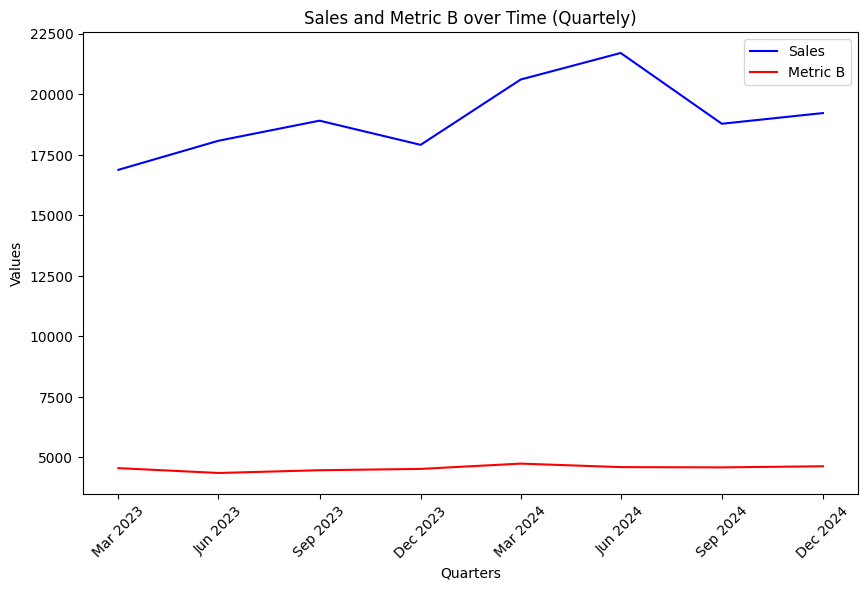

In [ ]:
# Lets sketch the line graph of Metric B against Sales

plt.figure(figsize=(10, 6))
plt.plot(quarterly_data.index, quarterly_data['Sales'], label='Sales', color='blue')
plt.plot(quarterly_data.index, quarterly_data['Metric_B'], label='Metric B', color='red')

# Formatting the plot
plt.title('Sales and Metric B over Time (Quartely)')
plt.xlabel('Quarters')
plt.xticks(rotation=45)
plt.ylabel('Values')
plt.xticks(quarterly_data.index, quarterly_data.index.strftime('%b %Y'))

plt.legend()

# Show the plot
plt.show()

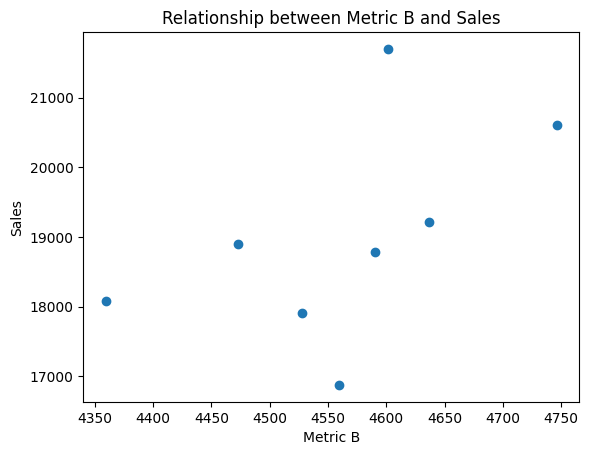

In [ ]:
# Lets find the relationship between Metric B and Sales

plt.scatter(quarterly_data['Metric_B'], quarterly_data["Sales"])
plt.xlabel('Metric B')
plt.ylabel('Sales')
plt.title('Relationship between Metric B and Sales')
plt.show()

Based on this, it looks like there is a positive correlation between Metric B and Sales.

In [ ]:
quarterly_data[['Metric_B', 'Sales']].corr(method ='pearson')

,Metric_B,Sales
Metric_B,1.000000,0.527971
Sales,0.527971,1.000000


Thus there is a positive correlation between Metric B and Sales where the correlation co-efficient is 0.53.

**Q2. If metric A increased by 10% over the next 3 months what could we expect from sales?**

In [ ]:
# Fit a Linear Regression Model

X_A = quarterly_data['Metric_A']
Y = quarterly_data['Sales']

# Train the data on 5 of the quarters and Test the data on the remaining 3.
X_train_A, X_test_A, Y_train, Y_test = train_test_split(X_A, Y, test_size=0.375, shuffle=False)


In [ ]:
# Build the regression model

X_train_A = X_train_A.values.reshape(-1, 1)
X_test_A = X_test_A.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train_A, Y_train)

LinearRegression()

In [ ]:
# Predict the 'Test' Sales values based on the model

Y_Pred = model.predict(X_test_A)

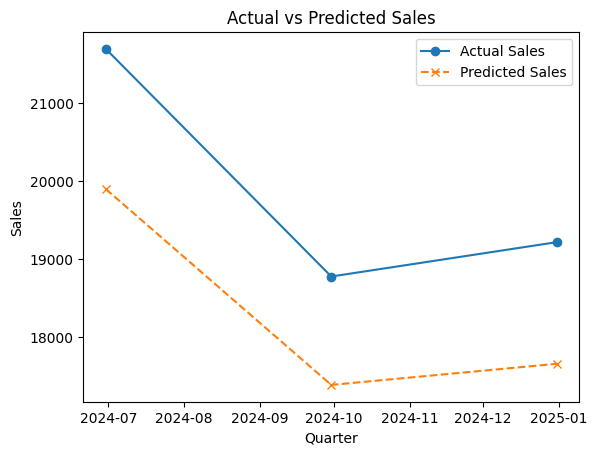

In [ ]:
# Lets visualise the Predicted Sales Values and Actual Sales values

plt.plot(Y_test.index, Y_test, label='Actual Sales', marker='o')
plt.plot(Y_test.index, Y_Pred, label='Predicted Sales', linestyle='--', marker='x')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

Text(0, 0.5, 'Predicted Sales values')

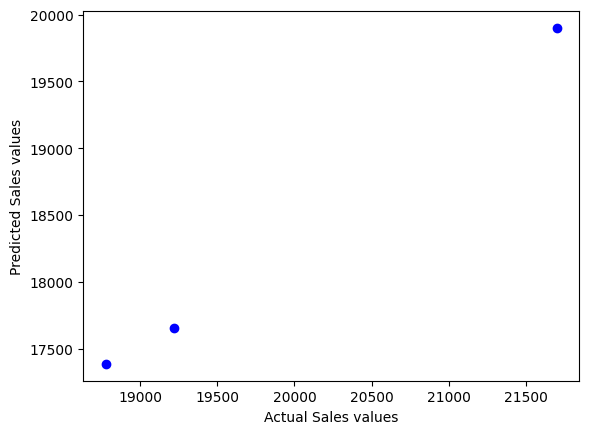

In [ ]:
# Lets visualise the relationship between the Actual and Predicted Sales

plt.scatter(Y_test, Y_Pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Sales values')
plt.ylabel('Predicted Sales values')

There seems to be a strong positive correlation between the Predicted Sales and the Actual Sales.

In [ ]:
# Correlation between Predicted and Actual

correlation_A = pearsonr(Y_test, Y_Pred)

print(correlation_A)

PearsonRResult(statistic=np.float64(0.9991216623547852), pvalue=np.float64(0.026684413537573136))


There is a very strong positive correlation of 0.9991.

In [ ]:
# To check for accuracy, I am going to check the MSE and MAPE values:

mse_A = mean_squared_error(Y_test, Y_Pred)
print(f"Mean Squared Error: {mse_A}")


absolute_percentage_error_A = np.abs((Y_test - Y_Pred) / Y_test) * 100
mean_average_percentage_error_A = np.mean(absolute_percentage_error_A)
print(f"The MAPE is: {mean_average_percentage_error_A}%")

Mean Squared Error: 2538610.125034134
The MAPE is: 7.944366543176674%


Since the MAPE is less than 10%, this means that the predicited sales values are very accurate relative to the actual sales values.

Now that we know that our model is accurate, we can use our linear regression model to predict the sales values over 3 months.

In [ ]:
# First lets increase the Q4 2024 Metric A value by 10%:

Q4_2024_MA = quarterly_data.iloc[-1]['Metric_A']

Q1_2025_MA = Q4_2024_MA * 1.1

""" Now lets input this new value for Metric A into our model to predict the
sales values over the next 3 months (the next quarter) """

Q1_2025_Sales_Prediction = model.predict([[Q1_2025_MA]])
print(f'If Metric A increased by 10% over the next 3 months, the expected sales will be {Q1_2025_Sales_Prediction}')


If Metric A increased by 10% over the next 3 months, the expected sales will be [18723.06304157]


Therefore, if Metric A increases by 10% over the next 3 months, the expected sales will be 18723.06

**Q3. If metric B decreased by 10% over the next 3 months, what would we expect from sales in the same period?**

In [ ]:
# Fit a Linear Regression Model

X_B = quarterly_data['Metric_B']
Y = quarterly_data['Sales']

# Train the data on 5 of the quarters and Test the data on the remaining 3.
X_train_B, X_test_B, Y_train_B, Y_test_B = train_test_split(X_B, Y, test_size=0.375, shuffle=False)

In [ ]:
# Build the regression model

X_train_B = X_train_B.values.reshape(-1, 1)
X_test_B = X_test_B.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train_B, Y_train_B)

LinearRegression()

In [ ]:
# Predict the 'Test' Sales values based on the model

Y_Pred_B = model.predict(X_test_B)

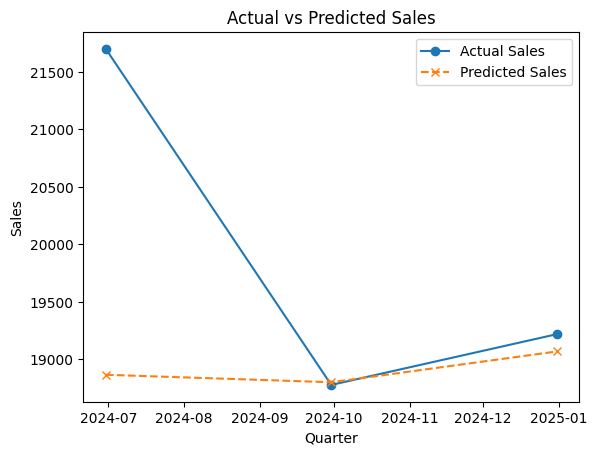

In [ ]:
# Lets visualise the Predicted Sales Values and Actual Sales values

plt.plot(Y_test_B.index, Y_test_B, label='Actual Sales', marker='o')
plt.plot(Y_test_B.index, Y_Pred_B, label='Predicted Sales', linestyle='--', marker='x')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

Text(0, 0.5, 'Predicted Sales values')

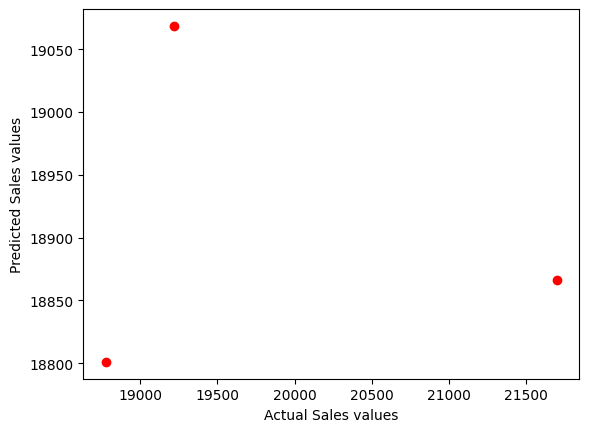

In [ ]:
# Lets visualise the relationship between the Actual and Predicted Sales

plt.scatter(Y_test_B, Y_Pred_B, color='red', label='Predicted vs Actual')
plt.xlabel('Actual Sales values')
plt.ylabel('Predicted Sales values')

In [ ]:
# Correlation between Predicted and Actual

correlation_B = pearsonr(Y_test_B, Y_Pred_B)

print(correlation_B)

PearsonRResult(statistic=np.float64(-0.14761318478207547), pvalue=np.float64(0.9056818626514475))


This means there is a weak negative correlation between the Predicted and Actual Sales values.

In [ ]:
# To check for accuracy, I am going to check the MSE and MAPE values:

mse_B = mean_squared_error(Y_test_B, Y_Pred_B)
print(f"Mean Squared Error: {mse_B}")


absolute_percentage_error_B = np.abs((Y_test_B - Y_Pred_B) / Y_test_B) * 100
mean_average_percentage_error_B = np.mean(absolute_percentage_error_B)
print(f"The MAPE is: {mean_average_percentage_error_B}%")

Mean Squared Error: 2684869.974440986
The MAPE is: 4.6550361660605795%


The MAPE is 4.66%. Since the MAPE is quite low, it is plausible to say that our model is quite accurate. So we can use our model to find the impact on sales due to a decrease in Metric B by 10%.

In [ ]:
# First lets decrease the Q4 2024 Metric B value by 10%:

Q4_2024_MB = quarterly_data.iloc[-1]['Metric_B']

Q1_2025_MB = Q4_2024_MB * 0.9

""" Now lets input this new value for Metric B into our model to predict the
sales values over the next 3 months (the next quarter) """

Q1_2025_Sales_Prediction_B = model.predict([[Q1_2025_MB]])
print(f'If Metric B decreased by 10% over the next 3 months, the expected sales will be {Q1_2025_Sales_Prediction_B}')

If Metric B decreased by 10% over the next 3 months, the expected sales will be [16409.68954827]


Therefore, if Metric B decreases by 10% over the next 3 months, the expected sales will be 16409.69.

**Q4. Which model(s) and methodologies have you used and why?**

First I conducted Explatory Data Analysis. This involved checking for null values and sketching a pairplot to visualise the relationship between sales and Metric A and Metric B. Then I conducted a Spearmen Correlation Analysis, which showed a weak correlation between sales and Metric A and Metric B. Upon sketching the line graph, comparing sales with the metrics, I observed a lot of noise in the data. To reduce the noise, I aggregated the data quarterly. Since the question asked for predictions over the next 3 months (1 quarter), I felt it was most appropriate to split the data up quarterly, rather than monthly. I visualised the relationships between sales and the metrics, which demonstrated a possible linear relationship. I recalculated the correlation co-efficient, which improved the co-efficient to 0.65 and 0.53. This indicates a strong positive linear relationship between sales and Metric A and Metric B. Since they were linearly correlated, a linear regression model was an appropriate choice to identify the impact of the metrics on sales. Additionally, since the focus was not on seasonal or time-based forecasting but rather on understanding how changes in metrics impact sales, I felt it was not appropriate to conduct a Time Series Forecast. I built and trained a linear regression model using a 5/8:3/8 split. This means that I trained the data on 5 of the quarters and tested it on 3 of the quarters. Finally, I used the trained linear regression model to predict sales when Metric A increased by 10% and Metric B decreased by 10%.

**Q5. How have you tested the accuracy of your forecast?**

To test for accuracy, I did these things:

After I trained the model, I compared the actual sales with the predicted sales of the test by sketching a scatterplot and conducting a correlation analysis to find the Pearson correlation co-efficient. I found that in both questions, the relationship between the predicted sales and the actual sales to be positive correlation.

Secondly, I plotted a line graph comparing the predicted sales from the model and the actual sales to visually inspect the residuals. Also, I observed that the trends seen in the predicted sales data were very similar to the trends of the actual sales data.

Finally, I calculated the Mean Squared Error and the Mean Percentage Error. In both questions, the models used to predict sales resulted in a MAPE below 10%, meaning that the model provided a highly accurate prediction.